In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/GPT_4.1-GPT_4.1_latest.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 41 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Model Pair                                     297 non-null    object 
 1   Grid ID                                        297 non-null    int64  
 2   Config ID                                      297 non-null    object 
 3   Run ID                                         297 non-null    object 
 4   Context                                        297 non-null    bool   
 5   Fog of War                                     297 non-null    object 
 6   Grid                                           297 non-null    object 
 7   Bucket                                         297 non-null    object 
 8   Sub-stratum                                    297 non-null    object 
 9   Pay4Partner                                    297 non

In [5]:
# remove all grids where theres a corrupt game
df = df[df["Format Errors"] == 0]

In [6]:
# Filter regular trading games
RT = df[df['Pay4Partner'] == False]

In [7]:
# Group by Bucket and Config ID, then get value counts for each group
game_count = RT.groupby(['Bucket', 'Config ID']).size().reset_index(name='counts')

print(game_count)


                                   Bucket  \
0   Independent (Both have optimal paths)   
1   Independent (Both have optimal paths)   
2   Independent (Both have optimal paths)   
3   Independent (Both have optimal paths)   
4                       Mutual Dependency   
5                       Mutual Dependency   
6                       Mutual Dependency   
7                       Mutual Dependency   
8                     Needy Player (Blue)   
9                     Needy Player (Blue)   
10                    Needy Player (Blue)   
11                    Needy Player (Blue)   

                                            Config ID  counts  
0   ctx1_fog00_p4pfalse_contract_contract_for_fini...      10  
1                   ctx1_fog00_p4pfalse_contract_none      10  
2                 ctx1_fog00_p4pfalse_contract_strict       9  
3   ctx1_fog00_p4pfalse_contract_tile_with_judge_i...      10  
4   ctx1_fog00_p4pfalse_contract_contract_for_fini...      12  
5                   ctx1_fog00

/tmp/ipython-input-2910346224.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['success'] = (filtered['Reached Goal Player 0'] == True) & (filtered['Reached Goal Player 1'] == True)
/tmp/ipython-input-2910346224.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


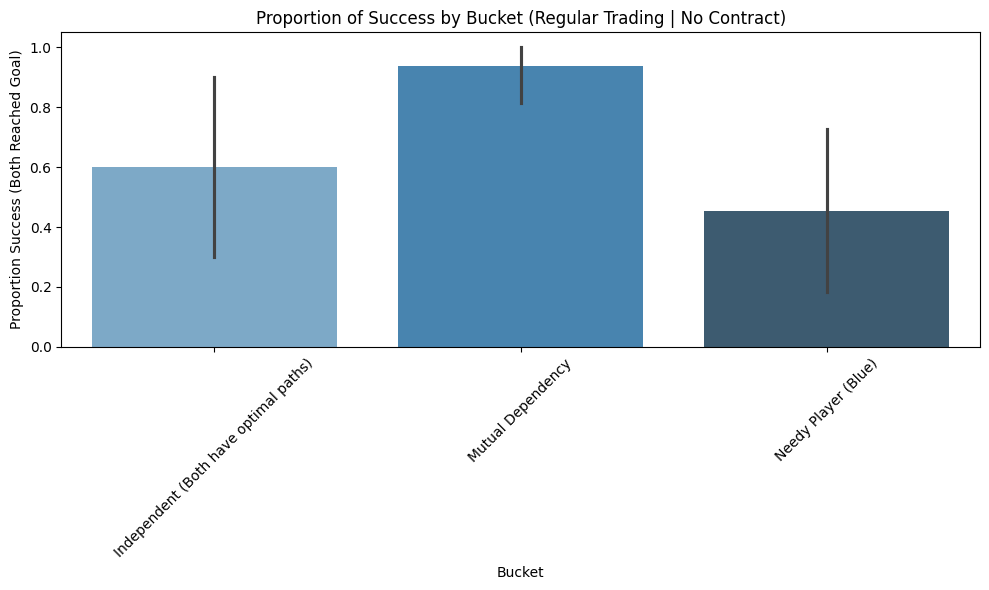

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter dataset
filtered = RT[RT['Config ID'] == 'ctx1_fog00_p4pfalse_contract_none']

# 2. Create a success flag where both players reached the goal
filtered['success'] = (filtered['Reached Goal Player 0'] == True) & (filtered['Reached Goal Player 1'] == True)

# 3. Aggregate: compute mean (proportion) and CI by Bucket
# Seaborn will handle proportion + error bars automatically if we plot with estimator='mean'
plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered,
    x='Bucket',
    y='success',
    estimator=lambda x: sum(x) / len(x),   # proportion of True
    errorbar='ci',                         # confidence interval error bars
    palette='Blues_d'
)

# 4. Formatting
plt.ylabel('Proportion Success (Both Reached Goal)')
plt.xlabel('Bucket')
plt.title('Proportion of Success by Bucket (Regular Trading | No Contract)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1103265326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RT['success'] = (RT['Reached Goal Player 0'] == True) & (RT['Reached Goal Player 1'] == True)
/tmp/ipython-input-1103265326.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RT['Config Label'] = RT['Config ID'].map(config_map)
/tmp/ipython-input-1103265326.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

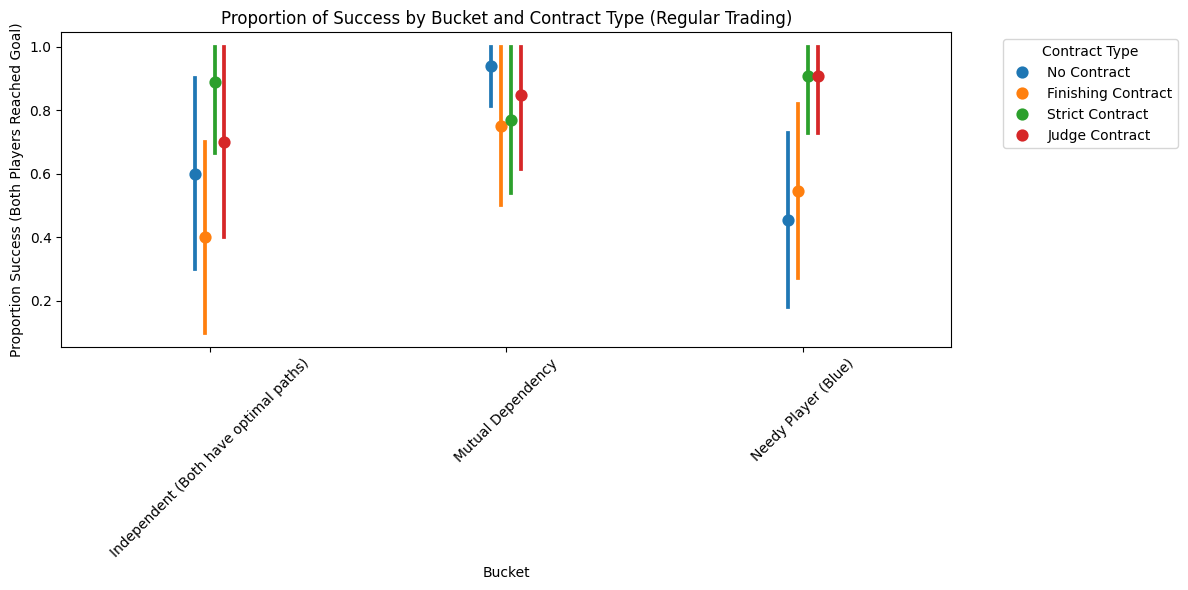

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create success column
RT['success'] = (RT['Reached Goal Player 0'] == True) & (RT['Reached Goal Player 1'] == True)

# 2. Map Config ID values to nicer names
config_map = {
    "ctx1_fog00_p4pfalse_contract_contract_for_finishing": "Finishing Contract",
    "ctx1_fog00_p4pfalse_contract_none": "No Contract",
    "ctx1_fog00_p4pfalse_contract_strict": "Strict Contract",
    "ctx1_fog00_p4pfalse_contract_tile_with_judge_implementation": "Judge Contract"
}
RT['Config Label'] = RT['Config ID'].map(config_map)

# 3. Ensure desired order (No Contract first)
order = ["No Contract", "Finishing Contract", "Strict Contract", "Judge Contract"]
RT['Config Label'] = pd.Categorical(RT['Config Label'], categories=order, ordered=True)

# 4. Point plot with remapped labels
plt.figure(figsize=(12, 6))
sns.pointplot(
    data=RT,
    x='Bucket',
    y='success',
    hue='Config Label',
    estimator=lambda x: sum(x) / len(x),  # proportion
    errorbar='ci',
    dodge=True,
    markers='o',
    linestyles=''   # just points, no connecting lines
)

# 5. Formatting
plt.ylabel('Proportion Success (Both Players Reached Goal)')
plt.xlabel('Bucket')
plt.title('Proportion of Success by Bucket and Contract Type (Regular Trading)')
plt.xticks(rotation=45)
plt.legend(title='Contract Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


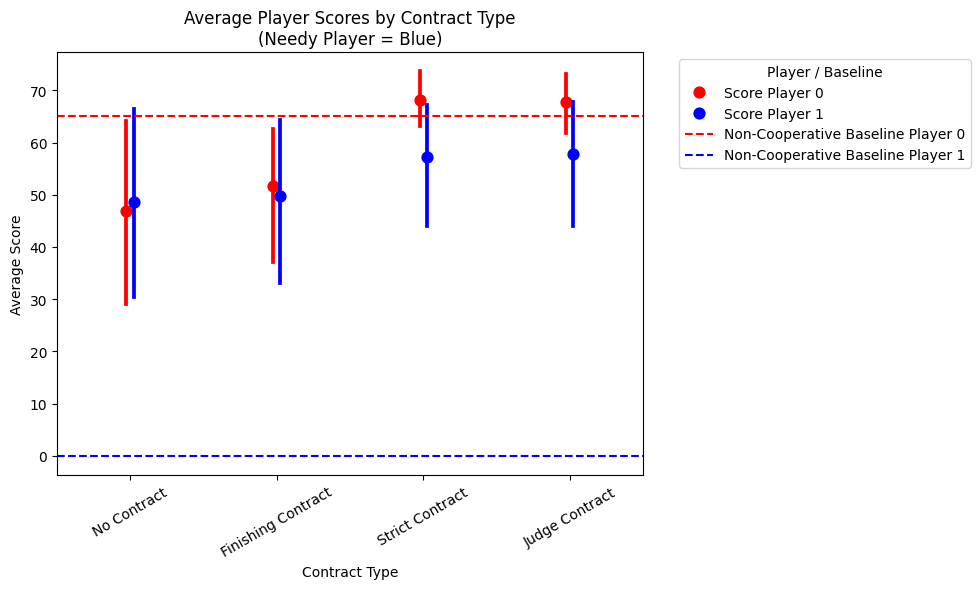

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter for specific bucket
subset = RT[RT['Bucket'] == 'Needy Player (Blue)'].copy()

# 2. Map Config ID to friendly names
config_map = {
    "ctx1_fog00_p4pfalse_contract_contract_for_finishing": "Finishing Contract",
    "ctx1_fog00_p4pfalse_contract_none": "No Contract",
    "ctx1_fog00_p4pfalse_contract_strict": "Strict Contract",
    "ctx1_fog00_p4pfalse_contract_tile_with_judge_implementation": "Judge Contract"
}
subset['Config Label'] = subset['Config ID'].map(config_map)

# 3. Ensure consistent order
order = ["No Contract", "Finishing Contract", "Strict Contract", "Judge Contract"]
subset['Config Label'] = pd.Categorical(subset['Config Label'], categories=order, ordered=True)

# 4. Reshape to long format for plotting
df_long = subset.melt(
    id_vars=['Config Label'],
    value_vars=['Score Player 0', 'Score Player 1'],
    var_name='Player',
    value_name='Score'
)

# 5. Compute average baseline scores
baseline_p0 = subset['Non-Cooperative Baseline Player 0'].mean()
baseline_p1 = subset['Non-Cooperative Baseline Player 1'].mean()

# 6. Point plot with custom colors
plt.figure(figsize=(10, 6))
sns.pointplot(
    data=df_long,
    x='Config Label',
    y='Score',
    hue='Player',
    order=order,
    errorbar='ci',
    dodge=True,
    markers='o',
    linestyles='',
    palette={
        'Score Player 0': 'red',
        'Score Player 1': 'blue'
    }
)

# 7. Add horizontal dotted lines for baseline
plt.axhline(y=baseline_p0, color='red', linestyle='--', label='Non-Cooperative Baseline Player 0')
plt.axhline(y=baseline_p1, color='blue', linestyle='--', label='Non-Cooperative Baseline Player 1')

# 8. Formatting
plt.ylabel('Average Score')
plt.xlabel('Contract Type')
plt.title("Average Player Scores by Contract Type\n(Needy Player = Blue)")
plt.xticks(rotation=30)

# Combine legends: get handles and labels from plot and axhline
handles, labels = plt.gca().get_legend_handles_labels()
# remove duplicate labels for players
from collections import OrderedDict
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Player / Baseline', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
